In [4]:
%load_ext autoreload
%autoreload 2

from ipycanvas import Canvas
import ipywidgets as widgets
from ipywidgets import interact

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

from lib.grid import Grid
from lib.draw import GridDrawer
from lib.update_schemes import EuclideanUpdateScheme
from lib.update_schemes import EuclideanInteractiveUpdateScheme, EuclideanObstacleAvoidingUpdateScheme, DijkstraUpdateScheme
from lib.simulator import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

## Create the grid

In [2]:
grid = Grid(
    rows=5,
    columns=5,
    pedestrians=[
        ((0, 1),1),
        ((1, 0),1)
    ],
    obstacles=[
        (4, 0),
        (0, 4)
    ],
    target=(2, 3)
)

## Draw the grid

In [3]:
canvas = Canvas(width=300, height=300)
grid_drawer = GridDrawer(canvas)
grid_drawer.draw(grid)

Canvas(height=300, width=300)

# Task 2

## Create the grid

In [4]:
grid = Grid(
    rows=50,
    columns=50,
    pedestrians=[
        ((4, 24),1)
    ],
    obstacles=[],
    target=(24, 24)
)

## Define the update scheme and run the simulation

In [5]:
update_scheme = EuclideanUpdateScheme()
states = simulate(grid, update_scheme, 25)

## Visualize the simulation

In [7]:
canvas = Canvas(width=300, height=300)
grid_drawer = GridDrawer(canvas)

def draw_simulation_step(step):
    return grid_drawer.draw(states[step])

interact(draw_simulation_step, step=widgets.IntSlider(min=0, max=25, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=25), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step(step)>

# Task 3

## Create the Pedestrians

In [8]:
pedestrians = []
targetPos = (25,25)
distance = 25
for i in range(0,5):
    sin = np.sin((np.pi*2 / 5)*i)
    cos = np.cos((np.pi*2 / 5)*i)
    newX = -distance * cos - 0 * sin
    newY = -distance * sin + 0 * cos
    pedestrians.append(
        ((int(newX+targetPos[0]), int(newY+targetPos[1])), 1)
    )

## Create the Grid

In [9]:
grid = Grid(
    rows=50,
    columns=50,
    pedestrians = pedestrians,
    obstacles=[],
    target=targetPos
)

## Use the old update scheme without avoidance

In [10]:
update_scheme = EuclideanUpdateScheme()
states_2 = simulate(grid, update_scheme, 30)

## Visualize the simulation

In [11]:
canvas = Canvas(width=800, height=800)
grid_drawer = GridDrawer(canvas)

def draw_simulation_step_2(step):
    return grid_drawer.draw(states_2[step])

interact(draw_simulation_step_2, step=widgets.IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_2(step)>

## Use the new update scheme with avoidance

### Create new grid

In [12]:
grid = Grid(
    rows=50,
    columns=50,
    pedestrians = pedestrians,
    obstacles=[],
    target=targetPos
)

### New update scheme

In [13]:
update_scheme = EuclideanInteractiveUpdateScheme(5)
states_3 = simulate(grid, update_scheme, 30)

### Visualize the simulation

In [14]:
canvas_3 = Canvas(width=800, height=800)
grid_drawer_3 = GridDrawer(canvas_3)

def draw_simulation_step_3(step):
    return grid_drawer_3.draw(states_3[step])

interact(draw_simulation_step_3, step=widgets.IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_3(step)>

# Task 4

## Looking at the Bottleneck scenario with rudimentary obstacle avoidance

## Create the grid

In [15]:
grid = Grid(
    rows=10,
    columns=25,
    pedestrians=[
        ((1, 0),1),
        ((2, 0),1),
        ((3, 0),1),
        ((4, 0),1),
        ((5, 0),1),
        ((6, 0),1)
    ],
    obstacles=[(0,12),(1,12),(2,12),(3,12),(4,12),(6,12),(7,12),(8,12),(9,12)],
    target=(5, 24)
)

## Use the obstacle avoiding update scheme

In [16]:
update_scheme = EuclideanObstacleAvoidingUpdateScheme(1.5)
states_4 = simulate(grid, update_scheme, 30)

## Visualize the scenario

In [17]:
canvas_4 = Canvas(width=500, height=200)
grid_drawer_4 = GridDrawer(canvas_4)

def draw_simulation_step_4(step):
    return grid_drawer_4.draw(states_4[step])

interact(draw_simulation_step_4, step=widgets.IntSlider(min=0, max=25, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=25), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_4(step)>

## Next the chicken test scenario

In [18]:
grid = Grid(
    rows=25,
    columns=25,
    pedestrians=[
        ((12, 0),1)
    ],
    obstacles=[(5,10),(5,11),(5,12),(5,13),(5,14),(5,15),
               (15,10),(15,11),(15,12),(15,13),(15,14),(15,15),
              (5,16),(6,16),(7,16),(8,16),(9,16),(10,16),(11,16),(12,16),(13,16),(14,16),(15,16)],
    target=(12, 24)
)

## Still using the basic obstacle avoidance scheme

In [19]:
update_scheme = EuclideanObstacleAvoidingUpdateScheme(1.5)
states_5 = simulate(grid, update_scheme, 30)

## Visualize the scenario

In [20]:
canvas_5 = Canvas(width=500, height=500)
grid_drawer_5 = GridDrawer(canvas_5)

def draw_simulation_step_5(step):
    return grid_drawer_5.draw(states_5[step])

interact(draw_simulation_step_5, step=widgets.IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_5(step)>

## Looking at the previous scenarios with the Dijkstra algorithm

## Bottleneck scenario 

In [22]:
grid = Grid(
    rows=10,
    columns=25,
    pedestrians=[
        ((1, 0),1),
        ((2, 0),1),
        ((3, 0),1),
        ((4, 0),1),
        ((5, 0),1),
        ((6, 0),1)
    ],
    obstacles=[(0,12),(1,12),(2,12),(3,12),(4,12),(6,12),(7,12),(8,12),(9,12)],
    target=(5, 24)
)
update_scheme = DijkstraUpdateScheme()
states_6 = simulate(grid, update_scheme, 30,avoid_overlapping = True)
canvas_6 = Canvas(width=500, height=200)
grid_drawer_6 = GridDrawer(canvas_6)

def draw_simulation_step_6(step):
    return grid_drawer_6.draw(states_6[step])

interact(draw_simulation_step_6, step=widgets.IntSlider(min=0, max=25, step=1, value=0))


interactive(children=(IntSlider(value=0, description='step', max=25), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_6(step)>

## Chicken test scenario

In [23]:
grid = Grid(
    rows=25,
    columns=25,
    pedestrians=[
        ((12, 0),1)
    ],
    obstacles=[(5,10),(5,11),(5,12),(5,13),(5,14),(5,15),
               (15,10),(15,11),(15,12),(15,13),(15,14),(15,15),
              (5,16),(6,16),(7,16),(8,16),(9,16),(10,16),(11,16),(12,16),(13,16),(14,16),(15,16)],
    target=(12, 24)
)
update_scheme = DijkstraUpdateScheme()
states_7 = simulate(grid, update_scheme, 30)
canvas_7 = Canvas(width=500, height=500)
grid_drawer_7 = GridDrawer(canvas_7)

def draw_simulation_step_7(step):
    return grid_drawer_7.draw(states_7[step])

interact(draw_simulation_step_7, step=widgets.IntSlider(min=0, max=30, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=30), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_7(step)>

# Task 5

### TEST1: RiMEA scenario 1

1 cell = 0.4m X 0.4m

40m = 100 cells (width of the canvas)

2m = 5 cells (height of the canvas)

Pedestrian speed = 1.33 m/s = 3.3 cell/s = (assume 1step = 5s) = 0.66 cell/step

Upper border is 34 seconds = 170 steps => so let's simulate for 170 steps

We should be able to observe how the pedestrian reaches the target between step 130 and 170




In [24]:
grid = Grid(
    rows=5,
    columns=100,
    pedestrians=[
        ((2, 0),0.66)
    ],
    obstacles=[],
    target=(2, 99)
)
update_scheme = EuclideanUpdateScheme()
states_8 = simulate(grid, update_scheme, 170)
canvas_8 = Canvas(width=500, height=25)
grid_drawer_8 = GridDrawer(canvas_8)

def draw_simulation_step_8(step):
    return grid_drawer_8.draw(states_8[step])

interact(draw_simulation_step_8, step=widgets.IntSlider(min=0, max=170, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=170), Output()), _dom_classes=('widget-intera…

<function __main__.draw_simulation_step_8(step)>

### TEST2: RiMEA scenario 4

I have no idea what to say about this :) Please, invent something.

In [31]:
cell = 0.4
length = 1000
width = 10
rows = int(width / cell)
columns = int(length / cell)
print(rows, columns)
density = 0.01 # P/m2
n_pedestrians = int(length * width * density)
print("Creating {} pedestrians".format(n_pedestrians))
pedestrians = [
    ((int(np.random.uniform(0, rows)), int(np.random.uniform(0, columns))), 0.66)
    for i in range(n_pedestrians)
]
grid = Grid(
    rows=rows,
    columns=columns,
    pedestrians=pedestrians,
    obstacles=[],
    target=(rows // 2, columns-1)
)
update_scheme = EuclideanUpdateScheme()
states_9 = simulate(grid, update_scheme, 300, report_every=10) # 1 step = 5 seconds; 60 seconds = 300 steps

measure_point = (2/cell,2/cell,4/cell,499/cell)

steps_needed = np.full(n_pedestrians, 0, dtype=int)


def in_bounds(cell: (int,int), area: (int,int,int,int)) -> bool:
    if cell[0] >= area[0] and cell[0] < area[0] + area[2]:
        if cell[1] >= area[1] and cell[1] < area[1] + area[3]:
            return True
    return False

total_speed = 0
amount = 0

for grid in states_9:
    pedestrians = grid.pedestrians
    for key in pedestrians.keys():
        if in_bounds(pedestrians[key][0],measure_point):
            steps_needed[key-10] = steps_needed[key-10] + 1
total = 0
for s in steps_needed:
    total = total + s
total = total/n_pedestrians

print("The Average speed is")
print(str(2/(total/5)))
print("m/s")
    

#canvas_9 = Canvas(width=10000, height=2000)
#grid_drawer_9 = GridDrawer(canvas_9)

#def draw_simulation_step_9(step):
#    return grid_drawer_9.draw(states_9[step])

#interact(draw_simulation_step_9, step=widgets.IntSlider(min=0, max=300, step=1, value=0))


25 2500
Creating 100 pedestrians
Simulated step 0
Simulated step 10
Simulated step 20
Simulated step 30
Simulated step 40
Simulated step 50
Simulated step 60
Simulated step 70
Simulated step 80
Simulated step 90
Simulated step 100
Simulated step 110
Simulated step 120
Simulated step 130
Simulated step 140
Simulated step 150
Simulated step 160
Simulated step 170
Simulated step 180
Simulated step 190
Simulated step 200
Simulated step 210
Simulated step 220
Simulated step 230
Simulated step 240
Simulated step 250
Simulated step 260
Simulated step 270
Simulated step 280
Simulated step 290
The Average speed is
0.0801538954793203
m/s


### TEST3: RiMEA scenario 6

In [25]:
grid = Grid(
    rows=30,
    columns=30,
    pedestrians=[
       ((int(np.random.uniform(24, 29)), int(np.random.uniform(0, 15))), 1)
        for i in range(20)
    ],
    obstacles= (
        [(29, i) for i in range(30)] + # lower wall
        [(i, 29) for i in range(30)] + # right wall
        [(23, i) for i in range(23)] + 
        [(i, 23) for i in range(23)] +
        [(23, 23)]
    ),
    target=(0, 26)
)
update_scheme = DijkstraUpdateScheme()
states_10 = simulate(grid, update_scheme, 40)
canvas_10 = Canvas(width=500, height=500)
grid_drawer_10 = GridDrawer(canvas_10)

def draw_simulation_step_10(step):
    return grid_drawer_10.draw(states_10[step])

interact(draw_simulation_step_10, step=widgets.IntSlider(min=0, max=40, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=40), Output()), _dom_classes=('widget-interac…

<function __main__.draw_simulation_step_10(step)>

### TEST4: RiMEA scenario 7

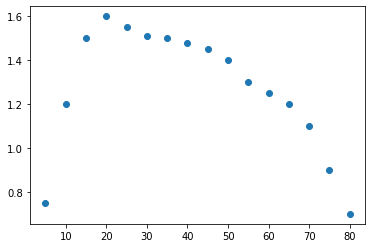

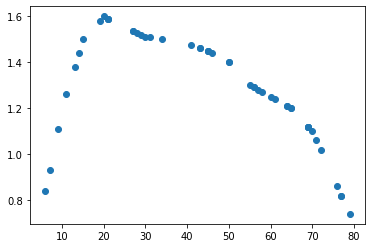

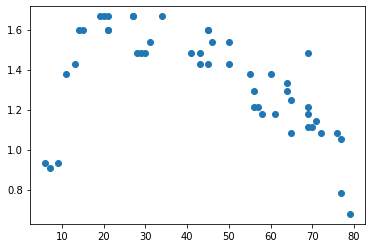

In [66]:
# This is the data from the graph in Figure 2(the speed is in meters per second)
speed = [0.75,1.2,1.5,1.6,1.55,1.51,1.50,1.48,1.45,1.4,1.3,1.25,1.2,1.1,0.9,0.7]
age = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]

cell_size = 0.4#meters
step_time = 5#seconds
time_scale = 20 #Needed because our pedestrians can't move faster than 1 cell per step
variance = 0 #Can be used to introduce some random jitter to the speeds
age_to_speed = interpolate.interp1d(age,speed,kind = 'linear') #This is the interpolation function

plt.plot(age, speed, 'o')

plt.show()
#Generate 50 pedestrians with random age
generated_age = []
generated_speed = []
for i in range(0,50):
    pedestrian_age = int(np.random.uniform(age[0], age[15]))
    generated_age.append(pedestrian_age)
    pedestrian_speed = age_to_speed(pedestrian_age)
    pedestrian_speed = pedestrian_speed + pedestrian_speed * np.random.uniform(-variance,variance)
    generated_speed.append(pedestrian_speed)

plt.plot(generated_age, generated_speed, 'o') #Seeing the 50 randomly generated pedestrians age and speed

plt.show()

update_scheme = DijkstraUpdateScheme() #Does not matter too much considering that it is a straight line
#Next create a grid for each pedestrian for the pedestrian to walk:
length = 25#cells
steps_needed = []
for i in generated_speed:
    
    grid = Grid(
        rows=3,
        columns=length,
        pedestrians=[
           ((1,0),(((i/time_scale)/cell_size)*step_time))
        ],
        obstacles= (
            [(0, j) for j in range(length)] + # upper wall
            [(2, j) for j in range(length)] # lower wall
        ),
        target=(1, length-1)
    )
    
    states_11 = simulate(grid, update_scheme,100) #If the amount of steps is not high enough, it is possible to get an error because not enough pedestrians reach the target
    #Figure out how many steps it took to reach the target:
    counter = 0
    for s in states_11:
        #If the pedestrian has reached the target
        if s.pedestrians[10][0] == (1, length-1):
            steps_needed.append(counter)
            break
        counter = counter + 1

average_speed = []            
for s in steps_needed:
    average_speed.append(((length*cell_size) / (s * step_time))*time_scale) #Convert it into meters per second

plt.plot(generated_age, average_speed, 'o')

plt.show()